<a href="https://colab.research.google.com/github/pvelosa/podcast-recomendation-system/blob/master/review_spotify_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import sqlite3 as sql
from bs4 import BeautifulSoup
import re

it is easier if i use sql queries to define whether is positive or negative.in this case i will define a review as positive when rating is >4

i took this from https://www.kaggle.com/soaxelbrooke/keras-rnn-sentiment-classifier

In [4]:
data = pd.read_sql( """
  select content ,
  case when rating <4 then 0
       when rating >4 then 1
  end as sentiment
  from reviews
""", con= sql.connect("drive/My Drive/ML/database.sqlite"))


In [5]:
data.head()

,content,sentiment
0,Thanks for providing these insights. Really e...,1.0
1,Super excited to see this podcast grow. So man...,1.0
2,"I'm a liberal myself, but its pretty obvious a...",0.0
3,I find Tedx talks very inspirational but I oft...,1.0
4,"I love this podcast, it is so good.",1.0


# understanding and priming data

could use sql queries to prime data but im gonna do it the old way

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239923 entries, 0 to 1239922
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   content    1239923 non-null  object 
 1   sentiment  1199118 non-null  float64
dtypes: float64(1), object(1)
memory usage: 18.9+ MB


In [7]:
data.describe()

,sentiment
count,1.199118e+06
mean,8.920090e-01
std,3.103692e-01
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [8]:
data.sentiment.value_counts()

1.0    1069624
0.0     129494
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


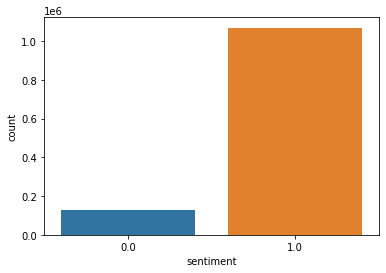

In [9]:
sns.countplot(data.sentiment)

In [10]:
def strip_html(text):
  soup = BeautifulSoup(text ,'html.parser')
  return soup.get_text()

def remove_special_character_text(text):
  strip_html(text)
  pattern = r'[^a-zA-z0-9\s]'#r treats the following as raw strings
  re.sub(pattern, '', text)
  return text 
  
  

In [11]:
data['content'] = data['content'].apply(remove_special_character_text)

In [12]:
x_data = data.content
y_data = data.sentiment
x_train, x_test,  y_train, y_test = train_test_split(x_data, y_data,  test_size=0.25, random_state=0)

# using count vectorizing 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
counter = CountVectorizer()

In [15]:
counter.fit(x_train)
X_train = counter.transform(x_train)
X_test = counter.transform(x_test)

In [16]:
X_train

<929942x216671 sparse matrix of type '<class 'numpy.int64'>'
	with 30676911 stored elements in Compressed Sparse Row format>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [18]:
X_train.shape[1]

216671

In [ ]:
X_train = X_train.toarray()

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=16, epochs=3, verbose=True)